In [1]:
# Import Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Import haul cycle info

haul_csv = "Resources\CycleTime.csv"
haul_prfl_xlsx = "Resources\Haul_data.xlsx"


cycles_df = pd.read_csv(haul_csv)
haul_profile_df = pd.read_excel(haul_prfl_xlsx)


In [3]:
# Create wt items for each haul View cycles_df
cycles_df["haul_full_wt"] = cycles_df["AvgFullHaul"]*cycles_df["Loads"]
cycles_df["haul_empty_wt"] = cycles_df["AvgEmptyHaul"]*cycles_df["Loads"]

cycles_df.dropna(inplace=True)
cycles_df.head()

,Date,Truck,Shovel,LoadLocation,DumpLocationAdjusted,MaterialType,AvgFullHaul,AvgTimeForDump,AvgEmptyHaul,AvgSpotQueue,AvgTimeLoading,Loads,CycleDist,AvgTimeCycle,haul_full_wt,haul_empty_wt
0,1/1/2020,T315,L530,X,CRUSHER 1,O-ARG,14.000000,5.216667,4.772222,5.088889,5.138889,3,4.0,34.216666,42.000000,14.316666
1,1/1/2020,T315,L530,X,CRUSHER 1,O-ARG,14.016667,3.472222,11.861111,0.138889,2.105555,3,4.2,31.594444,42.050000,35.583333
2,1/1/2020,T315,L530,X,CRUSHER 1,O-ARG,9.325000,4.608333,4.433333,5.258333,10.233333,2,4.4,33.858332,18.650000,8.866666
3,1/1/2020,T315,L530,X,CRUSHER 3,O-ARG,17.683333,2.733333,29.283333,0.000000,8.183333,1,5.1,57.883332,17.683333,29.283333
4,1/1/2020,T315,L530,X,CRUSHER 3,O-ARG,19.261111,2.238889,7.466667,1.027778,3.761111,3,5.1,33.755555,57.783333,22.400000


In [4]:
cycles_df['Date']=pd.to_datetime(cycles_df['Date'])

In [5]:
cycles_df.columns

Index(['Date', 'Truck', 'Shovel', 'LoadLocation', 'DumpLocationAdjusted',
       'MaterialType', 'AvgFullHaul', 'AvgTimeForDump', 'AvgEmptyHaul',
       'AvgSpotQueue', 'AvgTimeLoading', 'Loads', 'CycleDist', 'AvgTimeCycle',
       'haul_full_wt', 'haul_empty_wt'],
      dtype='object')

In [6]:
cycles_clean = cycles_df.drop(columns = ['Truck', 'Shovel', 'MaterialType','CycleDist', 'AvgTimeCycle','AvgSpotQueue', 
                                         'AvgTimeLoading','AvgTimeForDump'], axis=1)

In [7]:
cycles_group  = cycles_clean.groupby(by=['Date','LoadLocation','DumpLocationAdjusted']).sum()
cycles_group.reset_index(inplace=True)

In [8]:
cycles_group

,Date,LoadLocation,DumpLocationAdjusted,AvgFullHaul,AvgEmptyHaul,Loads,haul_full_wt,haul_empty_wt
0,2020-01-01,W,24N DUMP,9.527778,6.327778,3,28.583333,18.983333
1,2020-01-01,W,CRUSHER 1,542.627770,432.752768,39,700.933325,534.616656
2,2020-01-01,W,CRUSHER 3,823.407213,472.247768,74,1550.083321,912.966653
3,2020-01-01,X,24F,3.066666,8.833333,1,3.066666,8.833333
4,2020-01-01,X,CRUSHER 1,274.899995,208.687496,43,555.316659,387.949992
...,...,...,...,...,...,...,...,...
8944,2022-05-02,S,3330 EAST DUMP,214.799603,160.227280,53,872.266664,674.683327
8945,2022-05-02,T,CRUSHER 1,115.943332,87.378331,14,210.516665,160.316664
8946,2022-05-02,ZE,24D,41.349999,25.441666,4,49.033332,29.166666
8947,2022-05-02,ZF,24D,144.169442,129.394442,14,253.866663,260.183330


In [9]:
haul_group = haul_profile_df.groupby(by=["Date","Bench","DUMP"]).mean()
haul_group.reset_index(inplace=True)

In [10]:
haul_model = pd.merge(cycles_group,haul_group, how= 'inner', left_on =['Date','LoadLocation','DumpLocationAdjusted'],
                     right_on=['Date','Bench','DUMP'])

haul_model.drop(columns=['DumpLocationAdjusted','LoadLocation'], axis=1, inplace=True)

haul_model

,Date,AvgFullHaul,AvgEmptyHaul,Loads,haul_full_wt,haul_empty_wt,Bench,DUMP,Vlift+,Vlift-,Horiz
0,2020-01-01,9.527778,6.327778,3,28.583333,18.983333,W,24N DUMP,360.0,40.0,7802.0
1,2020-01-01,542.627770,432.752768,39,700.933325,534.616656,W,CRUSHER 1,780.0,40.0,12928.0
2,2020-01-01,823.407213,472.247768,74,1550.083321,912.966653,W,CRUSHER 3,870.0,40.0,20197.0
3,2020-01-01,3.066666,8.833333,1,3.066666,8.833333,X,24F,640.0,0.0,11862.0
4,2020-01-01,274.899995,208.687496,43,555.316659,387.949992,X,CRUSHER 1,780.0,0.0,9914.0
...,...,...,...,...,...,...,...,...,...,...,...
3746,2021-03-22,300.409620,224.247814,50,883.016661,666.799994,ZA,24E,840.0,40.0,14214.0
3747,2021-03-22,24.233333,13.483333,1,24.233333,13.483333,ZA,3270 EAST DUMP,1060.0,40.0,20992.0
3748,2021-03-22,466.249994,239.173607,37,906.599991,478.783327,ZA,CRUSHER 3,1030.0,40.0,20106.0
3749,2021-03-22,234.991664,171.641661,17,309.483331,227.266661,ZB,24E,840.0,40.0,13900.0


In [11]:
haul_model['AvgFullHaul'] = haul_model['haul_full_wt']/haul_model['Loads']
haul_model['AvgEmptyHaul'] = haul_model['haul_empty_wt']/haul_model['Loads']
haul_model['Up_dist'] = (haul_model['Vlift+']/.1)/5280
haul_model['Down_dist'] = (haul_model['Vlift-']/.1)/5280
haul_model['Flat_dst'] = (haul_model['Horiz']/5280)-haul_model['Up_dist']-haul_model['Down_dist']
haul_model['loaded_Uptime'] = (haul_model['Up_dist']/7)
haul_model['loaded_Downtime'] = (haul_model['Down_dist']/10)
haul_model['loaded_Flattime'] = (haul_model['Flat_dst']/28)
haul_model['empty_Uptime'] = (haul_model['Down_dist']/15)
haul_model['empty_Downtime'] = (haul_model['Up_dist']/16)
haul_model['empty_Flattime'] = (haul_model['Flat_dst']/30)
haul_model['Actual_cycle'] = haul_model['AvgFullHaul']+haul_model['AvgEmptyHaul']
haul_model['Calc_cycle'] = (haul_model['loaded_Uptime']+haul_model['loaded_Downtime']+haul_model['loaded_Flattime']
                            +haul_model['empty_Uptime']+haul_model['empty_Downtime']+haul_model['empty_Flattime'])*60

haul_model

,Date,AvgFullHaul,AvgEmptyHaul,Loads,haul_full_wt,haul_empty_wt,Bench,DUMP,Vlift+,Vlift-,...,Down_dist,Flat_dst,loaded_Uptime,loaded_Downtime,loaded_Flattime,empty_Uptime,empty_Downtime,empty_Flattime,Actual_cycle,Calc_cycle
0,2020-01-01,9.527778,6.327778,3,28.583333,18.983333,W,24N DUMP,360.0,40.0,...,0.075758,0.720076,0.097403,0.007576,0.025717,0.005051,0.042614,0.024003,15.855555,12.141721
1,2020-01-01,17.972649,13.708119,39,700.933325,534.616656,W,CRUSHER 1,780.0,40.0,...,0.075758,0.895455,0.211039,0.007576,0.031981,0.005051,0.092330,0.029848,31.680769,22.669426
2,2020-01-01,20.947072,12.337387,74,1550.083321,912.966653,W,CRUSHER 3,870.0,40.0,...,0.075758,2.101705,0.235390,0.007576,0.075061,0.005051,0.102983,0.070057,33.284459,29.766991
3,2020-01-01,3.066666,8.833333,1,3.066666,8.833333,X,24F,640.0,0.0,...,0.000000,1.034470,0.173160,0.000000,0.036945,0.000000,0.075758,0.034482,11.899999,19.220725
4,2020-01-01,12.914341,9.022093,43,555.316659,387.949992,X,CRUSHER 1,780.0,0.0,...,0.000000,0.400379,0.211039,0.000000,0.014299,0.000000,0.092330,0.013346,21.936434,19.860823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,2021-03-22,17.660333,13.336000,50,883.016661,666.799994,ZA,24E,840.0,40.0,...,0.075758,1.025379,0.227273,0.007576,0.036621,0.005051,0.099432,0.034179,30.996333,24.607846
3747,2021-03-22,24.233333,13.483333,1,24.233333,13.483333,ZA,3270 EAST DUMP,1060.0,40.0,...,0.075758,1.892424,0.286797,0.007576,0.067587,0.005051,0.125473,0.063081,37.716666,33.333820
3748,2021-03-22,24.502702,12.940090,37,906.599991,478.783327,ZA,CRUSHER 3,1030.0,40.0,...,0.075758,1.781439,0.278680,0.007576,0.063623,0.005051,0.121922,0.059381,37.442792,32.173945
3749,2021-03-22,18.204902,13.368627,17,309.483331,227.266661,ZB,24E,840.0,40.0,...,0.075758,0.965909,0.227273,0.007576,0.034497,0.005051,0.099432,0.032197,31.573529,24.361472


In [12]:
test = haul_model['Bench'].unique()


In [13]:
# Set variables for Regression

X = haul_model[['Calc_cycle']]
y = haul_model[['Actual_cycle']]


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Fit model
model = LinearRegression(fit_intercept=True)

# Learning stage
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [14]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"Model Score = {model.score(X,y)}")

Training Score: 0.7330194000411923
Testing Score: 0.8279704942447338
Model Score = 0.756864702715661


In [15]:
print(model.coef_)
print(model.intercept_)


[[0.86134996]]
[8.24523045]


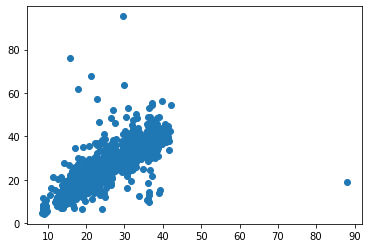

In [16]:
haul_model['Pred'] = (haul_model['Calc_cycle']*.86134996)+8.2452

haul_model['residual'] = haul_model['Pred']-haul_model['Actual_cycle']

plt.scatter(haul_model['Pred'],haul_model['Actual_cycle'])
plt.show()

In [17]:
haul_model['residual'].describe()

count    3751.000000
mean       -0.022855
std         4.127057
min       -65.651282
25%        -1.505664
50%         0.305803
75%         1.917917
max        68.740867
Name: residual, dtype: float64

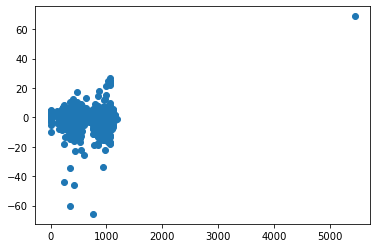

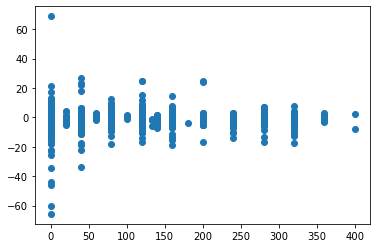

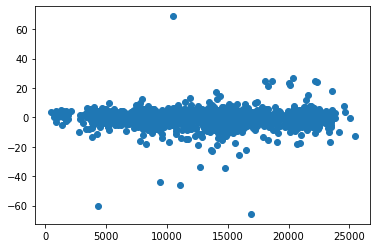

In [18]:
columns_list = ['Vlift+','Vlift-', 'Horiz']

for x in columns_list:
    plt.scatter(haul_model[x],haul_model['residual'])
    plt.show()

In [19]:
# Create list of unique dump locations 
cycles_df['DumpLocationAdjusted'].unique()

array(['CRUSHER 1', 'CRUSHER 3', '24F', '24N DUMP', '3240SOUTHEASTDUMP',
       '24Q DUMP', '24E', 'AREA 51 ROAD MATERIAL', '24ZB',
       '3400 STEMMING STOCKPILE', 'MIP-X__02', 'U-BENCH HGW STKPILE',
       '3270 EAST DUMP', '3170 LOWER EAST DUMP', '3270 WEST DUMP',
       '3600 DUMP', '3380 SWE DUMP', 'CR3 HAULBACK', '3400-WT HILL DUMP',
       '3430-WT-HILL-DUMP', '3442-WT-HILL-DUMP', '3500 EAST DUMP',
       'MIP-ZA__01', '3650 EAST PIMA', '24N DUMP SOUTH', 'MIP-N__01',
       '3240 ASHTON ROCK', '3330 ORE STOCKPILE1', '3240 SOUTH EAST DUMP',
       'A BENCH CAP', '3240 DUMP ON TOP', '3650 DUMP ON TOP',
       'CR3_MAYHEM_DUMP', '3640 S PIMA', 'A2_DUMPED_MATERIAL',
       'MAYHEM_DUMP', '3330 EAST DUMP', 'MIP-A3_02', '3240_DIRT_DUMP',
       '3240DUMP ON TOP', '24D', '3240 SOUTH', '24E DUMP ON TOP',
       '3270 SOUTH CANYON DUMP', '3280 SOUTH CANYON DUMP', '3280 DUMP',
       '3330 WEST DUMP', 'MAYHEM SOUTH DUMP'], dtype=object)

In [20]:
# Ore dumps
ore_dmps=['CRUSHER 1', 'CRUSHER 3','CRUSHER3','CR3 HAULBACK']

ore_dumps = haul_model[haul_model['DUMP'].isin(ore_dmps)]

waste_dumps = haul_model[~haul_model['DUMP'].isin(ore_dmps)]



In [21]:
# Check Regression by dump type
# Set variables for Regression

X = ore_dumps[['Calc_cycle']]
y = ore_dumps[['Actual_cycle']]


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Fit model
model = LinearRegression(fit_intercept=True)

# Learning stage
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"Model Score = {model.score(X,y)}")
print(model.coef_)
print(model.intercept_)

Training Score: 0.7927208389964073
Testing Score: 0.7408997411706744
Model Score = 0.7795949150959868
[[0.87457205]]
[8.11462867]


In [22]:
# Check Regression by dump type
# Set variables for Regression

X = waste_dumps[['Calc_cycle']]
y = waste_dumps[['Actual_cycle']]


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Fit model
model = LinearRegression(fit_intercept=True)

# Learning stage
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"Model Score = {model.score(X,y)}")
print(model.coef_)
print(model.intercept_)

Training Score: 0.5873568202983837
Testing Score: 0.6739308733849322
Model Score = 0.6101516210173192
[[0.81282523]]
[8.92669192]


In [23]:
#  Create Dumps and queue df

dq_df = cycles_df.drop(columns = ['Truck', 'Shovel', 'LoadLocation','MaterialType', 'AvgFullHaul','AvgEmptyHaul','AvgTimeLoading',
                                 'CycleDist', 'AvgTimeCycle', 'haul_full_wt', 'haul_empty_wt'], axis=1)

dq_df.dropna(inplace=True)

dq_df['dmp_wt'] = dq_df['AvgTimeForDump'] * dq_df['Loads']
dq_df['que_wt'] = dq_df['AvgSpotQueue'] * dq_df['Loads']

# Ore dumps
ore_dmps=['CRUSHER 1', 'CRUSHER 3','CRUSHER3','CR3 HAULBACK']

ore_dumps = dq_df[dq_df['DumpLocationAdjusted'].isin(ore_dmps)]

waste_dumps = dq_df[~dq_df['DumpLocationAdjusted'].isin(ore_dmps)]

In [24]:
# Average queue and dump times by location

dump_time_crusher = ore_dumps.groupby(by='DumpLocationAdjusted', as_index=False).sum()
dump_time_crusher['AvgTimeForDump'] = dump_time_crusher['dmp_wt']/dump_time_crusher['Loads']
dump_time_crusher['AvgSpotQueue'] = dump_time_crusher['que_wt']/dump_time_crusher['Loads']


dump_time = waste_dumps.groupby(by='DumpLocationAdjusted', as_index=False).sum()
dump_time['AvgTimeForDump'] = dump_time['dmp_wt']/dump_time['Loads']
dump_time['AvgSpotQueue'] = dump_time['que_wt']/dump_time['Loads']

In [25]:
# Review Crusher dump and spot performance
dump_time_crusher

,DumpLocationAdjusted,AvgTimeForDump,AvgSpotQueue,Loads,dmp_wt,que_wt
0,CR3 HAULBACK,0.366666,0.883333,1,0.366666,0.883333
1,CRUSHER 1,5.149551,3.189453,71898,370242.437244,229315.304414
2,CRUSHER 3,3.197327,3.177414,69148,221088.753868,219711.837505


In [26]:
# Review other dump and spot performance
dump_time = dump_time[dump_time['AvgTimeForDump']>.5]

average_dump_time = dump_time['dmp_wt'].sum() / dump_time['Loads'].sum()
average_queue_time = dump_time['que_wt'].sum() / dump_time['Loads'].sum()

print(f'The average dump time is {average_dump_time}')
print(f'The average queue time is {average_queue_time}')

The average dump time is 1.0627434797716415
The average queue time is 3.1849292727989806
